# 파이토치(PyTorch)

<img src="https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbuUgoV%2FbtqwWZvcHHX%2Fd6XzIFBEfiuFb0UvyV4A50%2Fimg.jpg" width="300">

- 코드 출처: https://pytorch.org/tutorials/

## 파이토치의 구성요소

- `torch`: 텐서를 생성하는 라이브러리

- `torch.autograd`: 자동미분 기능을 제공하는 라이브러리

- `torch.nn`: 신경망을 생성하는 라이브러리

- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리

- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공

- `torch.legacy`(./nn/.optim): Torch로부터 포팅해온 코드

- `torch.onnx`: ONNX(Open Neural Network Exchange)

  - 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)
- 넘파이(NumPy)의 ndarray와 유사

- GPU를 사용한 연산 가속도 가능

In [1]:
import torch

In [2]:
torch.__version__

'1.10.0+cu111'

### 초기화 되지 않은 행렬 

In [3]:
x = torch.empty(4,2) #초기화가 되지 않았으므로 메모리에서 사용된 값 그대로 딸려온다
print(x)

tensor([[-4.5226e+30,  3.0781e-41],
        [ 3.3631e-44,  0.0000e+00],
        [        nan,  3.0781e-41],
        [ 1.1578e+27,  1.1362e+30]])


### 무작위로 초기화된 행렬

In [4]:
x = torch.rand(4, 2)
print(x)

tensor([[0.2689, 0.1506],
        [0.0759, 0.5127],
        [0.0302, 0.4591],
        [0.4487, 0.1443]])


### dtype이 long, 0으로 채워진 텐서

In [5]:
x = torch.zeros(4, 2, dtype = torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


In [6]:
x = torch.tensor([3, 2.3])
print(x)

tensor([3.0000, 2.3000])


In [7]:
x = x.new_ones(2, 4, dtype = torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [8]:
x = torch.randn_like(x, dtype = torch.float)
print(x)

tensor([[ 0.2929, -1.2278, -0.7930,  0.1492],
        [ 0.8295, -1.6147,  0.0922, -0.6501]])


### 텐서의 크기

In [9]:
print(x.size())

torch.Size([2, 4])


## 텐서의 연산(operations)

### 덧셈 1

In [10]:
print(x)

tensor([[ 0.2929, -1.2278, -0.7930,  0.1492],
        [ 0.8295, -1.6147,  0.0922, -0.6501]])


In [13]:
y = torch.rand([2, 4])
print(y)
print(x + y)

tensor([[8.2083e-01, 3.0257e-02, 9.8358e-01, 2.3926e-01],
        [3.1841e-01, 7.2125e-01, 5.8248e-01, 7.8958e-04]])
tensor([[ 1.1137, -1.1976,  0.1906,  0.3885],
        [ 1.1479, -0.8934,  0.6747, -0.6493]])


### 덧셈2

In [14]:
print(torch.add(x, y))

tensor([[ 1.1137, -1.1976,  0.1906,  0.3885],
        [ 1.1479, -0.8934,  0.6747, -0.6493]])


### 덧셈3
- 결과 텐서를 인자로 제공

In [15]:
result = torch.empty(2, 4)
torch.add(x, y, out=result) #result 객체로 뺀다

tensor([[ 1.1137, -1.1976,  0.1906,  0.3885],
        [ 1.1479, -0.8934,  0.6747, -0.6493]])

### 덧셈4
- `in-place` 방식

- (참고) in-place 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [16]:
print(x)
print(y)
y.add_(x) # 언더바 붙이는거 잊지말기 y += x 형태로 된다
print(y)

tensor([[ 0.2929, -1.2278, -0.7930,  0.1492],
        [ 0.8295, -1.6147,  0.0922, -0.6501]])
tensor([[8.2083e-01, 3.0257e-02, 9.8358e-01, 2.3926e-01],
        [3.1841e-01, 7.2125e-01, 5.8248e-01, 7.8958e-04]])
tensor([[ 1.1137, -1.1976,  0.1906,  0.3885],
        [ 1.1479, -0.8934,  0.6747, -0.6493]])


### 그 외의 연산
- `torch.sub` : 뺄셈

- `torch.mul` : 곱셉

- `torch.div` : 나눗셈

- `torch.mm` : 내적(dot product)

In [17]:
x = torch.Tensor([[1,3],
                  [5,7]]) #이건 행렬 아닌가?
y = torch.Tensor(([[2,4],
                   [6,8]]))
print(x - y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])
tensor([[-1., -1.],
        [-1., -1.]])


In [18]:
x = torch.Tensor([[1,3],
                  [5,7]]) #이건 행렬 아닌가?
y = torch.Tensor(([[2,4],
                   [6,8]]))
print(x * y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])
tensor([[ 2., 12.],
        [30., 56.]])


In [20]:
x = torch.Tensor([[1,3],
                  [5,7]]) #이건 행렬 아닌가?
y = torch.Tensor(([[2,4],
                   [6,8]]))
print(x / y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])
tensor([[0.5000, 0.7500],
        [0.8333, 0.8750]])


In [21]:
x = torch.Tensor([[1,3],
                  [5,7]]) #이건 행렬 아닌가?
y = torch.Tensor(([[2,4],
                   [6,8]]))
print(torch.mm(x,y))
#matrix multiply
#dot product : 행렬 곱

tensor([[20., 28.],
        [52., 76.]])


## 텐서의 조작(manipulations)

### 인덱싱
- 넘파이처럼 인덱싱 사용가능

In [22]:
print(x)

tensor([[1., 3.],
        [5., 7.]])


In [23]:
print(x[:, 1])

tensor([3., 7.])


### view
- 텐서의 크기(size)나 모양(shape)을 변경

In [26]:
x = torch.randn(4, 5)
y = x.view(20) # tf에서 flatten과 같은 의미
z = x.view(5, -1) # 행을 5개로 잡고 나머지는 알아서 해라

print(x.size())
print(y.size())
print(z.size())

torch.Size([4, 5])
torch.Size([20])
torch.Size([5, 4])


### item
- 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [27]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.4108])
-0.4107905924320221
torch.float32


- 스칼라값 하나만 존재해야함

In [28]:
x = torch.randn(2)
print(x)
print(x.item())


tensor([ 0.9943, -0.1869])


ValueError: ignored

### squeeze 
- 차원을 축소(제거)

In [31]:
tensor = torch.rand(1, 3, 3)
print(tensor)
tensor.shape

tensor([[[0.0430, 0.0897, 0.4412],
         [0.8919, 0.9453, 0.6691],
         [0.5095, 0.5471, 0.0758]]])


torch.Size([1, 3, 3])

In [32]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.0430, 0.0897, 0.4412],
        [0.8919, 0.9453, 0.6691],
        [0.5095, 0.5471, 0.0758]])
torch.Size([3, 3])


### unsqueeze
- 차원을 증가(생성)

In [33]:
tensor = torch.rand(1, 3, 3)
print(tensor)
print(tensor.shape)

tensor([[[0.4351, 0.6208, 0.7173],
         [0.5167, 0.7267, 0.6882],
         [0.0769, 0.8358, 0.2055]]])
torch.Size([1, 3, 3])


In [34]:
t = tensor.unsqueeze(dim=0)

print(t)
print(t.shape)

tensor([[[[0.4351, 0.6208, 0.7173],
          [0.5167, 0.7267, 0.6882],
          [0.0769, 0.8358, 0.2055]]]])
torch.Size([1, 1, 3, 3])


### stack
- 텐서간 결합

In [36]:
x = torch.FloatTensor([1,4])
y = torch.FloatTensor([2,5])
z = torch.FloatTensor([3,6])

print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### cat
- 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 dim이 존재해야함
  - 예를 들어, 해당 차원을 늘려준 후 결합


In [37]:
a = torch.randn(1,1,3,3)
b = torch.randn(1,1,3,3)
c = torch.cat((a,b), dim=0) #dimensional 값을 지정해줘야한다 
#0으로 지정해줘서 맨 앞에 있는 차원으로 결합을 했음을 확인 가능

print(c)
print(c.size())

tensor([[[[ 0.9764,  0.6554, -0.4782],
          [ 1.1168,  0.5834,  0.2559],
          [-0.1941, -1.5963,  2.1446]]],


        [[[ 0.8063, -0.8965, -0.3528],
          [ 0.2626,  0.8278, -1.1009],
          [-0.5645, -1.0739, -0.1001]]]])
torch.Size([2, 1, 3, 3])


In [38]:
a = torch.randn(1,1,3,3)
b = torch.randn(1,1,3,3)
c = torch.cat((a,b), dim=1) #dimensional 값을 지정해줘야한다 

print(c)
print(c.size())

tensor([[[[ 0.6796,  0.6164,  0.4184],
          [ 1.4704, -0.0055, -3.0158],
          [-1.1387, -0.8820,  0.3290]],

         [[-2.0236,  1.1148, -0.7503],
          [ 1.8001, -1.2247,  1.0123],
          [ 0.8231,  1.7598, -0.0945]]]])
torch.Size([1, 2, 3, 3])


In [39]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)
c = torch.cat((a,b), dim=0) #dimensional 값을 지정해줘야한다 

print(c)
print(c.size())

tensor([[[ 0.1177,  1.9090,  0.6049],
         [-1.6268, -0.7400, -1.2701],
         [ 0.2470,  0.8938, -0.2996]],

        [[-0.2900,  0.8289, -0.1918],
         [ 0.3222,  0.2088,  0.4056],
         [-0.8590,  1.6330, -1.1172]]])
torch.Size([2, 3, 3])


### chuck
- 텐서를 여러 개로 나눌 때 사용

- 몇 개의 텐서로 나눌 것이냐

In [44]:
tensor = torch.rand(3, 6)
t1, t2, t3 = torch.chunk(tensor, 3, dim = 1) #텐서를 3으로 쪼개겠다

print(tensor)
print(t1)
print(t2)
print(t3)

tensor([[0.5415, 0.1065, 0.8569, 0.7126, 0.4820, 0.4461],
        [0.2343, 0.9660, 0.2096, 0.5859, 0.0569, 0.6865],
        [0.3028, 0.2852, 0.6888, 0.4770, 0.1780, 0.4249]])
tensor([[0.5415, 0.1065],
        [0.2343, 0.9660],
        [0.3028, 0.2852]])
tensor([[0.8569, 0.7126],
        [0.2096, 0.5859],
        [0.6888, 0.4770]])
tensor([[0.4820, 0.4461],
        [0.0569, 0.6865],
        [0.1780, 0.4249]])


### split
- `chunck`와 동일한 기능이지만 조금 다름

- 하나의 텐서당 크기가 얼마이냐

In [45]:
tensor =torch.rand(3,6)
t1, t2 = torch.split(tensor, 3, dim=1) #하나의 텐서 크기를 3으로 지정하여 쪼개겠다

print(tensor)
print(t1)
print(t2)
#중앙을 기준으로 양옆으로 쪼개짐을 확인

tensor([[0.8455, 0.6490, 0.8320, 0.8459, 0.8793, 0.4660],
        [0.1331, 0.2863, 0.6369, 0.6003, 0.6499, 0.4544],
        [0.0631, 0.7743, 0.6700, 0.2946, 0.6632, 0.7314]])
tensor([[0.8455, 0.6490, 0.8320],
        [0.1331, 0.2863, 0.6369],
        [0.0631, 0.7743, 0.6700]])
tensor([[0.8459, 0.8793, 0.4660],
        [0.6003, 0.6499, 0.4544],
        [0.2946, 0.6632, 0.7314]])


### torch ↔ numpy
- Torch Tensor(텐서)를 Numpy array(배열)로 변환 가능

  - `numpy()`
  - `from_numpy()`

- (참고)
  - Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [50]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [51]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [52]:
a.add_(1)
print(a)
print(b) 

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [54]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors
- `.to` 메소드를 사용하여 텐서를 어떠한 장치로도 옮길 수 있음
  - 예) cpu, gpu

In [55]:
import torch

In [56]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.0163])
-0.016298932954669
torch.float32


In [58]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

y = torch.ones_like(x, device=device)
x = x.to(device)
z = x + y
print(device)
print(z)
print(z.to("cpu", torch.double))

cuda
tensor([0.9837], device='cuda:0')
tensor([0.9837], dtype=torch.float64)


## AUTOGRAD (자동미분)
- autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공

- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻

- backprop를 위한 미분값을 자동으로 계산

### Tensor

- data: tensor형태의 데이터

- grad: data가 겨쳐온 layer에 대한 미분값 저장

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

- `requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

- 계산이 완료된 후, `.backward()`를 호출하면 자동으로 `gradient`를 계산할 수 있으며, `.grad` 속성에 누적됨

- 기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

- 기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad():`로 감싸면 `gradient`는 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

- Autograd 구현에서 매우 중요한 클래스 : `Function` 클래스

In [59]:
import torch

In [60]:
x = torch.ones(3,3, requires_grad=True) #연산의 추적
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [61]:
y = x + 5
print(y) # AddBackward는 자동적으로 gradient가 붙음을 알 수 있다

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [62]:
print(y.grad_fn)

In [63]:
z = y * y * 2
out = z.mean()
print(z, out)

tensor([[72., 72., 72.],
        [72., 72., 72.],
        [72., 72., 72.]], grad_fn=<MulBackward0>) tensor(72., grad_fn=<MeanBackward0>)


- `requires_grad_(...)`는 기존 텐서의 `requires_grad`값을 바꿔치기(`in-place`)하여 변경

In [65]:
a = torch.randn(3,3)
a = ((a * 3) / (a - 1))
print(a.requires_grad) # False

a.requires_grad_(True) 
print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn)

False
True


### 기울기(Gradient)
- 역전파: `.backward()`를 통해 역전파 계산 가능

In [66]:
out.backward()

In [67]:
print(x.grad)

tensor([[2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667],
        [2.6667, 2.6667, 2.6667]])


In [68]:
x = torch.randn(3, requires_grad= True)
y = x * 2
while y.data.norm() < 1000:
  y = y * 2

print(y)

tensor([ -436.3316, -1602.2869,  -501.8650], grad_fn=<MulBackward0>)


In [69]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad) # x를 추적하는 과정이니까

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


- `with torch.no_grad()`를 사용하여 gradient의 업데이트를 하지 않음

In [70]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


- `detach()`: 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [71]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


### 자동 미분 흐름 다시 보기(1)
- 계산 흐름  
  $a \rightarrow b  \rightarrow c  \rightarrow out $

<br>

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해  
  $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면  
    $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [72]:
import torch

In [73]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [74]:
a = torch.ones(2,2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [81]:
print("a.date:",a.data)
print("a.grad:",a.grad)
print("a.grad_fn:",a.grad_fn)

a.date: tensor([[1., 1.],
        [1., 1.]])
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn: None


- $b = a + 2$

In [76]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


- $c = b^2$ 

In [77]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [78]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [79]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


- a의 `grad_fn`이 None인 이유  
  직접적으로 계산한 부분이 없었기 때문

In [82]:
print("a.date:",a.data)
print("a.grad:",a.grad)
print("a.grad_fn:",a.grad_fn)

a.date: tensor([[1., 1.],
        [1., 1.]])
a.grad: tensor([[6., 6.],
        [6., 6.]])
a.grad_fn: None


In [84]:
print("b.date:",b.data)
print("b.grad:",b.grad)
print("b.grad_fn:",b.grad_fn)

b.date: tensor([[3., 3.],
        [3., 3.]])
b.grad: None
b.grad_fn: <AddBackward0 object at 0x7fd870c58310>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [85]:
print("c.date:",c.data)
print("c.grad:",c.grad)
print("c.grad_fn:",c.grad_fn)

c.date: tensor([[9., 9.],
        [9., 9.]])
c.grad: None
c.grad_fn: <PowBackward0 object at 0x7fd870c71f10>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [86]:
print("out.date:", out.data)
print("out.grad:", out.grad)
print("out.grad_fn:", out.grad_fn)

out.date: tensor(36.)
out.grad: None
out.grad_fn: <SumBackward0 object at 0x7fd9781b4950>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


### 자동 미분 흐름 다시 보기(2)
- `grad`값을 넣어서 `backward`

- 아래의 코드에서 `.grad`값이 None은 gradient값이 필요하지 않기 때문

In [87]:
x = torch.ones(3, requires_grad= True)
y = (x ** 2)
z = y ** 2 + x
out = z.sum()
print(out)

tensor(6., grad_fn=<SumBackward0>)


In [88]:
grad = torch.Tensor([0.1, 1, 100])
z.backward(grad)

In [89]:
print("x.date:", x.data)
print("x.grad:", x.grad)
print("x.grad_fn:", x.grad_fn)

x.date: tensor([1., 1., 1.])
x.grad: tensor([  0.5000,   5.0000, 500.0000])
x.grad_fn: None


In [90]:
print("y.date:", y.data)
print("y.grad:", y.grad)
print("y.grad_fn:", y.grad_fn)

y.date: tensor([1., 1., 1.])
y.grad: None
y.grad_fn: <PowBackward0 object at 0x7fd868246a90>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [91]:
print("z.date:", z.data)
print("z.grad:", z.grad)
print("z.grad_fn:", z.grad_fn)

z.date: tensor([2., 2., 2.])
z.grad: None
z.grad_fn: <AddBackward0 object at 0x7fd870c96050>


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


## nn & nn.functional

- 두 패키지가 같은 기능이지만 방식이 조금 다름

- 위의 `autograd` 관련 작업들을 두 패키지를 통해 진행할 수 있음

- 텐서를 직접 다룰 때 `requires_grad`와 같은 방식으로 진행할 수 있음

- 결론적으로, `torch.nn`은 attribute를 활용해 state를 저장하고 활용하고,  
  `torch.nn.functional`로 구현한 함수의 경우에는 인스턴스화 시킬 필요 없이 사용이 가능
 


### nn 패키지

- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때  
  - 따라서, `weight`값들을 직접 선언 안함

- 예시
  - Containers

  - Convolution Layers

  - Pooling layers

  - Padding Layers

  - Non-linear Activations (weighted sum, nonlinearity)

  - Non-linear Activations (other)

  - Normalization Layers

  - Recurrent Layers

  - Transformer Layers

  - Linear Layers

  - Dropout Layers

  - Sparse Layers

  - Distance Functions

  - Loss Functions

  - ..
- https://pytorch.org/docs/stable/nn.html



In [92]:
import torch
import torch.nn as nn

- Convolution Layer 예시 (1)


In [93]:
m = nn.Conv2d(16, 33, 3, stride=2)

m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding= (4, 2))

m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding= (4, 2), dilation=(3, 1)) #dilation은 간격

input = torch.randn(20, 16, 50, 100)
output = m(input)

In [94]:
output.shape

torch.Size([20, 33, 26, 100])

### nn.functional 패키지

- 가중치를 직접 선언하여 인자로 넣어줘야함

- 예시)
  - Convolution functions

  - Pooling functions
  
  - Non-linear activation functions

  - Normalization functions

  - Linear functions

  - Dropout functions
  
  - Sparse functions
  
  - Distance functions

  - Loss functions
  - ..

- https://pytorch.org/docs/stable/nn.functional.html

In [95]:
import torch
import torch.nn.functional as F

- Convolution Layer 예시 (2)

In [96]:
filters = torch.randn(8, 4, 3, 3)

In [97]:
inputs = torch.randn(1, 4, 5, 5)
conv = F.conv2d(inputs, filters, padding=1)
conv.shape

torch.Size([1, 8, 5, 5])

## Torchvision

- `transforms`: 전처리할 때 사용하는 메소드

- `transforms`에서 제공하는 클래스 이외에  
  일반적으로 클래스를 따로 만들어 전처리 단계를 진행
  
  - 아래의 코드에서 다양한 전처리 기술 확인  
    https://pytorch.org/docs/stable/torchvision/transforms.html


In [98]:
import torch
import torchvision
import torchvision.transforms as transforms

- 예시)
  - `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있음

  - `Compose`를 통해 리스트 안에 순서대로 전처리 진행

  - 대표적인 예로, `ToTensor`()를 하는 이유는  
   <u>torchvision이 PIL Image형태로만 입력을 받기 때문에</u> 데이터 처리를 위해서 Tensor형으로 변환해야함

In [99]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5, ), std= (0.5,))])

## utils.data

- `Dataset`에는 다양한 데이터셋이 존재  
  - MNIST, CIFAR10, ...

- `DataLoader`, `Dataset`을 통해  
  `batch_size`, `train`여부, `transform`등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [100]:
import torch
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.transforms as transforms

In [101]:
trainset = torchvision.datasets.MNIST(root='/content',
                                      train=True,
                                      download=True,
                                      transform = transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [102]:
testset = torchvision.datasets.MNIST(root='/content',
                                      train=False,
                                      download=True,
                                      transform = transform)

In [103]:
train_loader = DataLoader(trainset, batch_size  = 8 , shuffle= True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=False, num_workers= 2)

- `batch_size`만큼 데이터를 하나씩 가져옴

In [104]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

<u>**(중요) torch에서는 channel(채널)이 앞에 옴**</u>

- `channel first`

- tensorflow, keras 등에서는 channel이 뒤에 옴(`channel last`)

### 데이터 확인

In [105]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [107]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [108]:
image = torch_image.numpy()
image.shape

(28, 28)

In [109]:
label = labels[0].numpy()
label.shape

()

In [110]:
label

array(8)

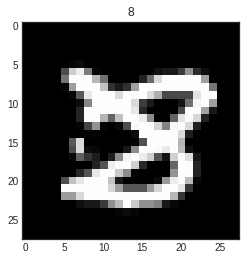

In [111]:
plt.title(label)
plt.imshow(image, 'gray')

## 각 Layer 설명

In [112]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### nn.Conv2d

- `in_channels`: channel의 갯수

- `out_channels`: 출력 채널의 갯수

- `kernel_size`: 커널(필터) 사이즈

- 텐서플로우, 케라스와 다르게 레이어의 `input`인자에도 값을 집어 넣어줘야함

In [113]:
nn.Conv2d(in_channels = 1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [114]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

- `wegiht`확인

In [115]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- `weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [116]:
weight = weight.detach()

In [117]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

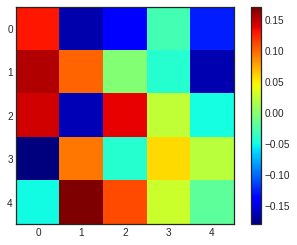

In [118]:
plt.imshow(weight[0, 0, :,:], 'jet')
plt.colorbar()
plt.show()

In [119]:
print(images.shape)

torch.Size([8, 1, 28, 28])


In [120]:
input_image = torch.unsqueeze(images[0], dim=0)

In [121]:
output_data = layer(input_image)

In [122]:
output = output_data.data

In [123]:
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

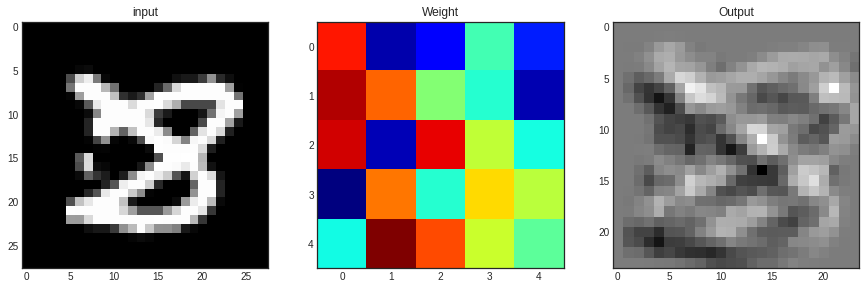

In [124]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title("input")
plt.imshow(image,'gray')

plt.subplot(132)
plt.title("Weight")
plt.imshow(weight[0, 0, :, :],'jet')

plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0,0,:,:],'gray')
plt.show()

### Pooling
- `F.max_pool2d` 
  - `stride`

  - `kernel_size`

- `torch.nn.MaxPool2d` 도 많이 사용

In [125]:
image.shape

(28, 28)

In [126]:
 pool = F.max_pool2d(output, 2, 2)
 pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [127]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

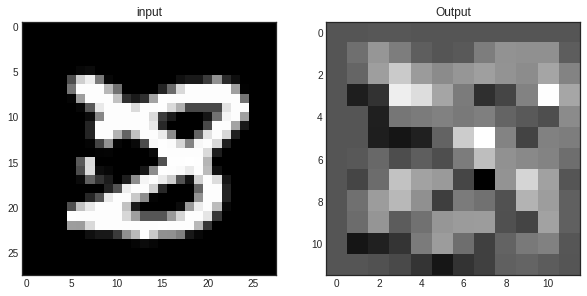

In [129]:
plt.figure(figsize=(10, 15))

plt.subplot(121)
plt.title("input")
plt.imshow(image,'gray')

plt.subplot(122)
plt.title("Output")
plt.imshow(pool_arr[0,0,:,:],'gray')
plt.show()

### Linear
- 1d만 가능 `.view()`를 통해 1D로 펼쳐줘야함

In [130]:
image = torch.from_numpy(image)
image.shape

torch.Size([28, 28])

In [131]:
flatten = image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [132]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [135]:
lin

tensor([[ 4.3110e-01,  1.2315e+00, -3.5086e-01, -4.9554e-01,  8.9514e-04,
          2.2784e-01,  8.9708e-01,  2.2057e-01, -4.8752e-02,  1.5490e-01]],
       grad_fn=<AddmmBackward0>)

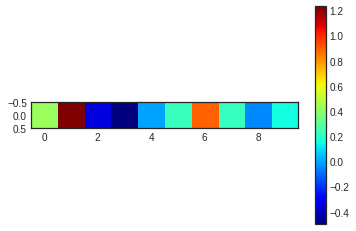

In [136]:
plt.imshow(lin.detach().numpy(),'jet')
plt.colorbar()
plt.show()

### Softmax

In [137]:
with torch.no_grad():
  flatten = image.view(1, 28 * 28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim = 1)

In [138]:
softmax

tensor([[0.1036, 0.0260, 0.0551, 0.0647, 0.1887, 0.0868, 0.1033, 0.0950, 0.1965,
         0.0800]])

In [139]:
np.sum(softmax.numpy())

1.0000001

### F.relu

- ReLU 함수를 적용하는 레이어

- `nn.ReLU`로도 사용 가능

In [141]:
inputs = torch.randn(4,3,28,28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [142]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape                      

torch.Size([4, 20, 24, 24])

## Optimizer

- `import torch.optim as optim`

- `model`의 파라미터를 업데이트

- 예시)
  ```python
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
  optimizer = optim.SGD(model.parameters(), lr=0.001)
  ```

- `.zero_grad()`로 초기화
- `.step()`으로 업데이트

